# Preprocessing Banjir

Anggota:
- Ahmad Danindra Nugroho (5025211259)
- Muhammad Ghifari Taqiuddin (5025211063)
- Raihan Farid (5025201141)
- Talitha Hayyinas Sahala (5025211263)

# Preparations

In [1]:
# Installing dependencies
# Only run once
%pip install gnews nlp-id PySastrawi pillow matplotlib numpy wordcloud pandas

Defaulting to user installation because normal site-packages is not writeable
  Using cached gnews-0.3.6-py3-none-any.whl (16 kB)
     |████████████████████████████████| 54.8 MB 141 kB/s eta 0:00:01
     |████████████████████████████████| 210 kB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 168 kB 3.3 MB/s eta 0:00:01
  Using cached feedparser-6.0.11-py3-none-any.whl (81 kB)
  Using cached bs4-0.0.2-py2.py3-none-any.whl (1.2 kB)
  Using cached dnspython-1.16.0-py2.py3-none-any.whl (188 kB)
  Using cached requests-2.26.0-py2.py3-none-any.whl (62 kB)
  Using cached pymongo-3.12.3.tar.gz (821 kB)
  Using cached python_dotenv-0.19.2-py2.py3-none-any.whl (17 kB)
  Using cached beautifulsoup4-4.9.3-py3-none-any.whl (115 kB)
     |████████████████████████████████| 143 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 163 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 66 kB 234 kB/s eta 0:00:01
     |████████████████████████████████| 8.5 MB 2.4 MB/

In [2]:
# Import all dependencies
from nlp_id import tokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import os

In [3]:
# Directory for all related files
dataset_dir = '../dataset/'
os.makedirs(dataset_dir, exist_ok=True)

In [4]:
os.listdir(dataset_dir)

['Gempa Bumi-2018-2023.csv',
 'Kebakaran-2018-2023.csv',
 'Banjir-2018-2023.csv',
 'Kecelakaan-2018-2023.csv']

## Loading Dataset

In [121]:
df = pd.read_csv(os.path.join(dataset_dir, 'Banjir-2018-2023.csv'))
df = df.drop(columns=['description' , 'url', 'publisher'])
df['title'] = df['title'].apply(lambda x: x.split(' - ')[0])
df = df[['published date', 'title']]
print(df.shape)
df.head()

(6400, 2)


,published date,title
0,2018-02-02 08:00:00+00:00,Banjir genangi 23 desa di Kabupaten Jember
1,2018-02-04 08:00:00+00:00,"Ini, 11 Titik Banjir di Denpasar yang Belum Te..."
2,2018-02-04 08:00:00+00:00,FOTO: Banjir Rob Terjang Semarang
3,2018-02-05 08:00:00+00:00,"Longsor tewaskan tiga orang, Jakarta mulai ban..."
4,2018-02-05 08:00:00+00:00,Jalur Pantura Kudus tersendat akibat banjir


## Preprocessing

1. Casefolding: mengubah semua karakter huruf ke huruf kecil
2. Stemming: mengubah suatu kata menjadi bentuk dasarnya (mengatakan -> kata)
3. Tokenization: memecah kalimat menjadi beberapa token
4. Stopwords Removal: memfilter kata yang sering muncul tapi tidak berpengaruh dalam pemrosesan (tergantung umumnya konjungsi, preposisi, pronomina, dsb.)

In [122]:
# 1. Casefolding
df['title'] = df['title'].str.lower()
df.head()

,published date,title
0,2018-02-02 08:00:00+00:00,banjir genangi 23 desa di kabupaten jember
1,2018-02-04 08:00:00+00:00,"ini, 11 titik banjir di denpasar yang belum te..."
2,2018-02-04 08:00:00+00:00,foto: banjir rob terjang semarang
3,2018-02-05 08:00:00+00:00,"longsor tewaskan tiga orang, jakarta mulai ban..."
4,2018-02-05 08:00:00+00:00,jalur pantura kudus tersendat akibat banjir


In [123]:
# 2. Stemming
# Menggunakan stemmer dari library PySastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['stem'] = df['title'].apply(stemmer.stem)
df.head()

,published date,title,stem
0,2018-02-02 08:00:00+00:00,banjir genangi 23 desa di kabupaten jember,banjir genang 23 desa di kabupaten jember
1,2018-02-04 08:00:00+00:00,"ini, 11 titik banjir di denpasar yang belum te...",ini 11 titik banjir di denpasar yang belum tan...
2,2018-02-04 08:00:00+00:00,foto: banjir rob terjang semarang,foto banjir rob terjang semarang
3,2018-02-05 08:00:00+00:00,"longsor tewaskan tiga orang, jakarta mulai ban...",longsor tewas tiga orang jakarta mulai banjir ...
4,2018-02-05 08:00:00+00:00,jalur pantura kudus tersendat akibat banjir,jalur pantura kudus sendat akibat banjir


In [124]:
# 3. Tokenization
# Menggunakan tokenizer dari library nlp-id
tok = tokenizer.Tokenizer()

df['tokens'] = df['stem'].apply(tok.tokenize)
df.head()

,published date,title,stem,tokens
0,2018-02-02 08:00:00+00:00,banjir genangi 23 desa di kabupaten jember,banjir genang 23 desa di kabupaten jember,"[banjir, genang, 23, desa, di, kabupaten, jember]"
1,2018-02-04 08:00:00+00:00,"ini, 11 titik banjir di denpasar yang belum te...",ini 11 titik banjir di denpasar yang belum tan...,"[ini, 11, titik, banjir, di, denpasar, yang, b..."
2,2018-02-04 08:00:00+00:00,foto: banjir rob terjang semarang,foto banjir rob terjang semarang,"[foto, banjir, rob, terjang, semarang]"
3,2018-02-05 08:00:00+00:00,"longsor tewaskan tiga orang, jakarta mulai ban...",longsor tewas tiga orang jakarta mulai banjir ...,"[longsor, tewas, tiga, orang, jakarta, mulai, ..."
4,2018-02-05 08:00:00+00:00,jalur pantura kudus tersendat akibat banjir,jalur pantura kudus sendat akibat banjir,"[jalur, pantura, kudus, sendat, akibat, banjir]"


In [125]:
# 4. Stopwords removal
# Menggunakan list stopwords dari library nltk
list_stopwords = set(stopwords.words('indonesian'))


def remove_stopwords(tokens):
    return [word for word in tokens if word not in list_stopwords]

keywords = ("pesan")
mask = df['title'].str.contains(keywords)
df = df[~mask]

df['tokens_clean'] = df['tokens'].apply(remove_stopwords)
df.head()

,published date,title,stem,tokens,tokens_clean
0,2018-02-02 08:00:00+00:00,banjir genangi 23 desa di kabupaten jember,banjir genang 23 desa di kabupaten jember,"[banjir, genang, 23, desa, di, kabupaten, jember]","[banjir, genang, 23, desa, kabupaten, jember]"
1,2018-02-04 08:00:00+00:00,"ini, 11 titik banjir di denpasar yang belum te...",ini 11 titik banjir di denpasar yang belum tan...,"[ini, 11, titik, banjir, di, denpasar, yang, b...","[11, titik, banjir, denpasar, tangan, balipost..."
2,2018-02-04 08:00:00+00:00,foto: banjir rob terjang semarang,foto banjir rob terjang semarang,"[foto, banjir, rob, terjang, semarang]","[foto, banjir, rob, terjang, semarang]"
3,2018-02-05 08:00:00+00:00,"longsor tewaskan tiga orang, jakarta mulai ban...",longsor tewas tiga orang jakarta mulai banjir ...,"[longsor, tewas, tiga, orang, jakarta, mulai, ...","[longsor, tewas, orang, jakarta, banjir, ungsi..."
4,2018-02-05 08:00:00+00:00,jalur pantura kudus tersendat akibat banjir,jalur pantura kudus sendat akibat banjir,"[jalur, pantura, kudus, sendat, akibat, banjir]","[jalur, pantura, kudus, sendat, akibat, banjir]"


In [126]:
df[df['title'].str.contains("pesan")]


,published date,title,stem,tokens,tokens_clean


In [127]:
# Mengecek jumlah data dalam DataFrame
jumlah_data = df.shape[0]
print("Jumlah data dalam DataFrame adalah:", jumlah_data)

Jumlah data dalam DataFrame adalah: 6373


In [128]:
# Gabungkan kembali token pada kolom 'tokens_clean'
df['merged'] = df['tokens_clean'].apply(lambda token: ' '.join(token))
df.head()

,published date,title,stem,tokens,tokens_clean,merged
0,2018-02-02 08:00:00+00:00,banjir genangi 23 desa di kabupaten jember,banjir genang 23 desa di kabupaten jember,"[banjir, genang, 23, desa, di, kabupaten, jember]","[banjir, genang, 23, desa, kabupaten, jember]",banjir genang 23 desa kabupaten jember
1,2018-02-04 08:00:00+00:00,"ini, 11 titik banjir di denpasar yang belum te...",ini 11 titik banjir di denpasar yang belum tan...,"[ini, 11, titik, banjir, di, denpasar, yang, b...","[11, titik, banjir, denpasar, tangan, balipost...",11 titik banjir denpasar tangan balipost com
2,2018-02-04 08:00:00+00:00,foto: banjir rob terjang semarang,foto banjir rob terjang semarang,"[foto, banjir, rob, terjang, semarang]","[foto, banjir, rob, terjang, semarang]",foto banjir rob terjang semarang
3,2018-02-05 08:00:00+00:00,"longsor tewaskan tiga orang, jakarta mulai ban...",longsor tewas tiga orang jakarta mulai banjir ...,"[longsor, tewas, tiga, orang, jakarta, mulai, ...","[longsor, tewas, orang, jakarta, banjir, ungsi...",longsor tewas orang jakarta banjir ungsi langsung
4,2018-02-05 08:00:00+00:00,jalur pantura kudus tersendat akibat banjir,jalur pantura kudus sendat akibat banjir,"[jalur, pantura, kudus, sendat, akibat, banjir]","[jalur, pantura, kudus, sendat, akibat, banjir]",jalur pantura kudus sendat akibat banjir


## Visualisasi WordCloud

Pembanding data antara sebelum dan setelah dilakukan pra-pemrosesan

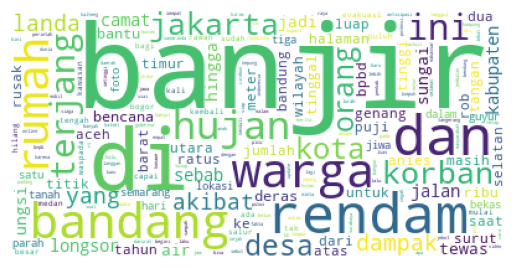

In [130]:
text_before = ' '.join(df['stem'].tolist())
wordcloud_before = WordCloud(background_color='white', collocations=False).generate(text_before)

plt.imshow(wordcloud_before)
plt.axis("off")
plt.show()

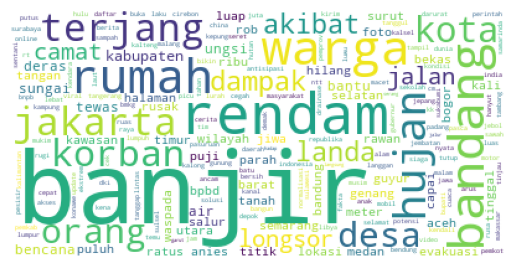

In [131]:
text_after = ' '.join(df['merged'])
wordcloud_after = WordCloud(background_color='white', collocations=False).generate(text_after)

plt.imshow(wordcloud_after)
plt.axis("off")
plt.show()

In [114]:
# Simpan output ke dalam CSV
df.to_csv('Banjir-2018-2023-pre.csv', index=False)